# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

#Tenemos modelos de regresión logística, random forest, k neighbors y linear svc

In [5]:
# Your code here
data=pd.read_csv('data_all.csv')
data.head(50)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(116322, 785)

In [5]:
data.columns  # cada una de las columnas del dataset, e es el indice para cada caracter

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [7]:
data.loc[data['e'] == 61]   # llamado a buscar los rows donde e es equivalente a caracter
                            # e = 0 a 9 números
                            #e = 10 a 35 letras mayusculas
                            #e= 36 a 61 letras minusculas

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
134,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115581,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115586,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115893,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116057,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data.loc[data['e'] == search_e]

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
134,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115581,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115586,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115893,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116057,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


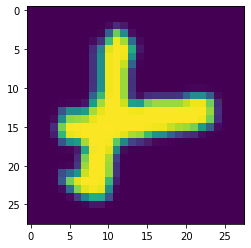

In [71]:

search_e=55  #61 es la ultima letra minúscula ' z '

first_row=data.loc[data['e'] == search_e].index[10]  # from toying around with the row value, i can tell that the 'e' feature
            #is the numeric order for the character...
            # being, 0 to 9 the numbers, then cap letters and finally minusculas.
        
            #index[0] agarra el primer row donde aparece search_e o sea 'z' minuscula 

image=np.array(data.iloc[first_row,1:]) #iloc del numero de row y slicing agarra desde la columna 1 hasta el final... la columna 0 es el index solamente

fig, ax=plt.subplots()

ax.imshow(image.reshape(28,28));



* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [6]:
#Lets make the distinct dataframes

data_number=data[data.e<=9].copy()  #dataframe of only numbers
data_upper=data[(data.e>10) & (data.e<=35)].copy()  # dataframe of only upper case
data_lower=data[(data.e>35) & (data.e<=61)].copy()  # dataframe of only lower case

In [20]:
data_number

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116315,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116316,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data_upper

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116308,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116309,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116312,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116313,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data_lower

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116300,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116301,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116310,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116314,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Upper Case

#### Building the training and test sets

In [7]:
y = data_upper['e']
X = data_upper.drop(columns=['e'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from  sklearn.preprocessing import StandardScaler

In [28]:
# Logistic Regression 

upper_logistic=LogisticRegression(max_iter=1000)
upper_logistic.fit(X_train, y_train)

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_test.to_numpy()
y_test

30565     28.0
11294     30.0
99186     13.0
105969    15.0
115638    18.0
          ... 
14094     33.0
70998     34.0
37687     24.0
81460     24.0
102097    30.0
Name: e, Length: 6057, dtype: float64

In [39]:
log_pred=upper_logistic.predict(X_test)
df_pred_compar=pd.DataFrame({'Actual':y_test, 'Predicted':log_pred}) # creamos nuevo dataframe con valores
                                                                     # reales del data set vs valores predecidos por regresión logistica
                                                                     
df_pred_compar

,Actual,Predicted
30565,28.0,28.0
11294,30.0,23.0
99186,13.0,24.0
105969,15.0,29.0
115638,18.0,18.0
...,...,...
14094,33.0,18.0
70998,34.0,33.0
37687,24.0,24.0
81460,24.0,24.0


In [42]:
accuracy_log = accuracy_score(y_test,log_pred)
print( 'la exactitud de la Regresíon Logistica es de:', accuracy_log  )


la exactitud de la regresíon logistica es de: 0.7422816575862639


In [43]:
# K Neighbors

KNmodel=KNeighborsClassifier(n_neighbors=3)

In [44]:
KNmodel.fit(X_train, y_train)   #ajusta el modelo
KN_pred=KNmodel.predict(X_test) #predice a partir de X_test
df_KN_compar=pd.DataFrame({'Actual':y_test, 'KN pred': KN_pred}) # crea el dataframe de comparación
df_KN_compar


,Actual,KN pred
30565,28.0,28.0
11294,30.0,30.0
99186,13.0,24.0
105969,15.0,15.0
115638,18.0,18.0
...,...,...
14094,33.0,33.0
70998,34.0,18.0
37687,24.0,24.0
81460,24.0,24.0


In [45]:
KN_accuracy=accuracy_score(y_test, KN_pred)
print('La precisión del método K Neighbors es: ', KN_accuracy)

#-----------Se recomienda variar con diferente número de K_neighbors------

La precisión del método K Neighbors es:  0.8841010401188707


In [51]:
# Random Forest
RF_model= RandomForestClassifier(n_estimators=100,max_depth=None) #Nombra modelo randomforest
RF_model.fit(X_train, y_train)                                 #Ajuste
RF_pred=RF_model.predict(X_test)                               #predicción
df_RF_compar=pd.DataFrame({'Actual':y_test, 'RF_predicted': RF_pred})
df_RF_compar




,Actual,RF_predicted
30565,28.0,28.0
11294,30.0,27.0
99186,13.0,24.0
105969,15.0,15.0
115638,18.0,18.0
...,...,...
14094,33.0,33.0
70998,34.0,29.0
37687,24.0,24.0
81460,24.0,24.0


In [53]:
RF_accuracy=accuracy_score(RF_pred, y_test)
print('La precisión de Random Forest con profundidad máxima es de: ', RF_accuracy)

La precisión de Randomo Forest con profundidad máxima es de:  0.9129932309724286


In [10]:
# Linear SVC  (support vector classification)

svc_model = OneVsOneClassifier(LinearSVC())
svc_model.fit(X_train, y_train)
svc_pred=svc_model.predict(X_test)
df_svc_compar=pd.DataFrame({'Actual':y_test, 'svc_predicted': svc_pred})
df_svc_compar

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Actual,svc_predicted
57599,22.0,22.0
51589,15.0,15.0
56622,21.0,21.0
56401,30.0,30.0
114164,12.0,12.0
...,...,...
76893,24.0,24.0
44816,17.0,17.0
107548,18.0,18.0
78889,24.0,24.0


In [12]:
svc_accuracy=accuracy_score(y_test, svc_pred)
print('The accuracy of support vector classification is : ',svc_accuracy)

The accuracy of support vector classification is :  0.8291233283803864


#### Comparativo de métodos

-Regresión logistica tuvo un número decnte (0.74) de accuracy a pesar de que 1000 iteraciones fueron clasificadas como insuficientes para ajustar el modelo, 

-K Neighbors tuvo una precisión de 0.88 con K=3

-Random Forest tuvo una precisión de 0.91 ajustando la profundidad al máximo.

-Support vector classification had a score of 0.82, tuvo problemas de convergencia y requierió mucho tiempo de cómputo


In [35]:
#import winsound
duration = 1000  # milliseconds
freq = 300  # Hz
winsound.Beep(freq, duration)

* Try to do the same thing with lowercases.

In [36]:
# Your code here

y = data_lower['e']
X = data_lower.drop(columns=['e'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
#Logistic Regression

log_model=LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)
log_pred=log_model.predict(X_test)
df_log_compar=pd.DataFrame({'Actual':y_test, 'Logistic Predicted': log_pred})
winsound.Beep(freq, duration)
df_log_compar

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Logistic Predicted
10434,47.0,47.0
39712,49.0,49.0
8574,52.0,52.0
15197,55.0,55.0
86531,56.0,56.0
...,...,...
90048,41.0,41.0
65627,39.0,39.0
9359,60.0,55.0
82244,43.0,43.0


In [45]:
logis_accuracy=accuracy_score(y_test, log_pred)
print('La precisión de la clasificación logistica fue de: ', logis_accuracy)

La precisión de la clasificación logistica fue de:  0.790650406504065


In [47]:
# K Neighbors

#KNmodel=KNeighborsClassifier(n_neighbors=3)
KNmodel=KNeighborsClassifier(n_neighbors=4)
KNmodel.fit(X_train, y_train)
KNmodel_pred=KNmodel.predict(X_test)
df_KN_compar=pd.DataFrame({'Actual': y_test, 'KN_prediction':KNmodel_pred})
winsound.Beep(freq, duration)
df_KN_compar

,Actual,KN_prediction
10434,47.0,44.0
39712,49.0,49.0
8574,52.0,42.0
15197,55.0,47.0
86531,56.0,56.0
...,...,...
90048,41.0,41.0
65627,39.0,39.0
9359,60.0,44.0
82244,43.0,43.0


In [48]:
KN_accuracy=accuracy_score(y_test, KNmodel_pred)
print('La precisión de KN neighbors es de: ', KN_accuracy)  #nota: se incrementó mucho el tiempo de precesamiento con 4 neighbors

La precisión de KN neighbors es de:  0.8619733924611973


In [37]:
# Random Forest

RF_model= RandomForestClassifier(n_estimators=100,max_depth=None) #Nombra modelo randomforest
RF_model.fit(X_train, y_train)                                 #Ajuste
RF_pred=RF_model.predict(X_test)                               #predicción
df_RF_compar=pd.DataFrame({'Actual':y_test, 'RF_predicted': RF_pred})
winsound.Beep(freq, duration)
df_RF_compar


,Actual,RF_predicted
10434,47.0,47.0
39712,49.0,49.0
8574,52.0,42.0
15197,55.0,55.0
86531,56.0,56.0
...,...,...
90048,41.0,41.0
65627,39.0,39.0
9359,60.0,55.0
82244,43.0,43.0


In [38]:
RF_accuracy=accuracy_score(y_test, RF_pred)
print('La precisión de Random Forest es de: ', RF_accuracy)

La precisión de Random Forest es de:  0.8856245380635624


In [49]:
# Support vector Classification

svc_model = OneVsOneClassifier(LinearSVC())
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
df_svc_compar=pd.DataFrame({'Actual': y_test, 'SVC_prediction':svc_pred})
winsound.Beep(freq,duration)
df_svc_compar


C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

,Actual,SVC_prediction
10434,47.0,44.0
39712,49.0,49.0
8574,52.0,52.0
15197,55.0,55.0
86531,56.0,56.0
...,...,...
90048,41.0,41.0
65627,39.0,39.0
9359,60.0,55.0
82244,43.0,43.0


In [50]:
svc_accuracy=accuracy_score(y_test, svc_pred)
print('La precisión de Support Vector Classification es de: ', svc_accuracy)

La precisión de Support Vector Classification es de:  0.7923133776792314


In [51]:
print('RESULTADOS de precision DE ALGORITMOS')

print('Logistic regressión:', round(logis_accuracy, 2))
print('KNeighbors :', round(KN_accuracy ,2))
print('Random Forest', round(RF_accuracy, 2))
print('Support Vector Classifier', round(svc_accuracy ,2))


RESULTADOS de precision DE ALGORITMOS
Logistic regressión: 0.79
KNeighbors : 0.86
Random Forest 0.89
Support Vector Classifier 0.79


#### Confusión en Random Forest

Random Forest, que fue el mejor evaluado, confundió la q y la g, asi como la y con la t.
Explorar el resto de los algortimos para detectar sus errores

* Try to do the same thing with numbers.

In [77]:
# Your code here

X=data_number.drop(columns=['e'])
y=data_number.e

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
#Logistic Regression
logis_model=LogisticRegression(max_iter=300)
logis_model.fit(X_train, y_train)
logis_pred=logis_model.predict(X_test)
df_logis_compar=pd.DataFrame({'Actual':y_test, 'Logistical Prediction': logis_pred})
winsound.Beep(freq, duration)
df_logis_compar

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Logistical Prediction
71555,8.0,8.0
103706,2.0,2.0
33407,5.0,5.0
50014,7.0,7.0
26594,2.0,3.0
...,...,...
91678,5.0,5.0
115624,2.0,2.0
73536,9.0,9.0
35205,5.0,5.0


In [80]:
#K Neighbors

KNmodel=KNeighborsClassifier(n_neighbors=4)
KNmodel.fit(X_train, y_train)
KNmodel_pred=KNmodel.predict(X_test)
df_KN_compar=pd.DataFrame({'Actual': y_test, 'KN_prediction':KNmodel_pred})
winsound.Beep(freq, duration)
df_KN_compar

,Actual,KN_prediction
71555,8.0,8.0
103706,2.0,2.0
33407,5.0,5.0
50014,7.0,7.0
26594,2.0,3.0
...,...,...
91678,5.0,5.0
115624,2.0,2.0
73536,9.0,9.0
35205,5.0,5.0


In [81]:
# Random Forest

RF_model= RandomForestClassifier(n_estimators=100,max_depth=None) #Nombra modelo randomforest
RF_model.fit(X_train, y_train)                                 #Ajuste
RF_pred=RF_model.predict(X_test)                               #predicción
df_RF_compar=pd.DataFrame({'Actual':y_test, 'RF_predicted': RF_pred})
winsound.Beep(freq, duration)
df_RF_compar

,Actual,RF_predicted
71555,8.0,8.0
103706,2.0,2.0
33407,5.0,5.0
50014,7.0,7.0
26594,2.0,7.0
...,...,...
91678,5.0,5.0
115624,2.0,2.0
73536,9.0,9.0
35205,5.0,5.0


In [82]:
# SVC 

svc_model = OneVsOneClassifier(LinearSVC())
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
df_svc_compar=pd.DataFrame({'Actual': y_test, 'SVC_prediction':svc_pred})
winsound.Beep(freq,duration)
df_svc_compar


C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\ANACONDA3.7\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Actual,SVC_prediction
71555,8.0,8.0
103706,2.0,2.0
33407,5.0,5.0
50014,7.0,7.0
26594,2.0,3.0
...,...,...
91678,5.0,5.0
115624,2.0,2.0
73536,9.0,9.0
35205,5.0,3.0


In [83]:
logis_accuracy=accuracy_score(y_test, logis_pred)
print('La precision de Regresión Logistica es de: ', logis_accuracy)

KN_accuracy=accuracy_score(y_test, KNmodel_pred)
print('La precision de K Neighbors es de: ', KN_accuracy)

RF_accuracy=accuracy_score(y_test,RF_pred)
print('La precisión de Random Forest es de: ', RF_accuracy)

scv_accuracy=accuracy_score(y_test, svc_pred)
print('La precisión de scv_accuracy es de :', scv_accuracy)

La precision de Regresión Logistica es de:  0.9255006906077348
La precision de K Neighbors es de:  0.9698722375690608
La precisión de Random Forest es de:  0.9722030386740331
La precisión de scv_accuracy es de : 0.9213570441988951


### Conclusión

El mejor método por precisión y velocidad de computo es Random Forest